In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
from scipy.stats import sem, ttest_ind
import requests
import time
import seaborn as sns
from us import states

In [2]:
wine_df = pd.read_csv("winemag-data-130k-v2.csv", encoding='ISO-8859-1')
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkíæ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oäó»Keefe,@kerinokeefe,Nicosia 2013 Vulkíæ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineæ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineæ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
#Cleaning the Data and dropping the wines without prices listed
wine_df = wine_df[['country','description','designation','points','price','province','region_1','region_2', 'taster_name', 'title', 'variety','winery']]
wine_prices_full = wine_df.dropna(subset=['price'])

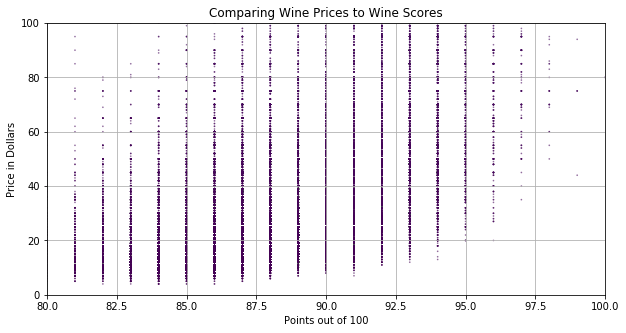

In [4]:
#Plotting all Wines under $100
x_axis = wine_prices_full['points']
price = wine_prices_full['price']
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlim(80, 100)
plt.ylim(0, 100)
plt.title("Comparing Wine Prices to Wine Scores")
plt.xlabel("Points out of 100")
plt.ylabel("Price in Dollars")
plt.grid()

c=wine_prices_full["price"]
plt.scatter(x_axis, price, marker="o", c=c, s=.5, alpha=0.5)

# Save the figure
# plt.savefig("Latitude_vs_Temp.png")


plt.show()


Model slope:     5.607501402538224
Model intercept: -460.46243009070275


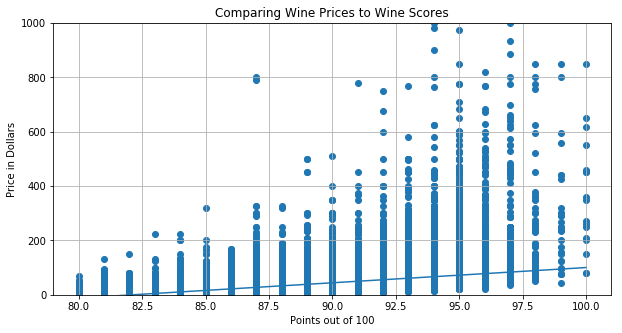

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

# x_axis_30 = wine_under_30['points']

model.fit(x_axis[:, np.newaxis], price)
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlim(79, 101)
plt.ylim(0, 1000)
xfit = np.linspace(80, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.title("Comparing Wine Prices to Wine Scores")
plt.xlabel("Points out of 100")
plt.ylabel("Price in Dollars")
plt.grid()
plt.scatter(x_axis, price)
plt.plot(xfit, yfit);

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

# rng = np.random.RandomState(1)
# X = 10 * rng.rand(100, 3)
# y = 0.5 + np.dot(X, [1.5, -2., 1.])

# model.fit(X, y)
# print(model.intercept_)
# print(model.coef_)

In [1]:
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=wine_prices_full["points"], y= wine_prices_full["price"])
r_squared=r_value**2
print("Model slope:    ", model.coef_[0])
print("r_squared = " , r_squared )
print("p_value = ", p_value)

NameError: name 'stats' is not defined

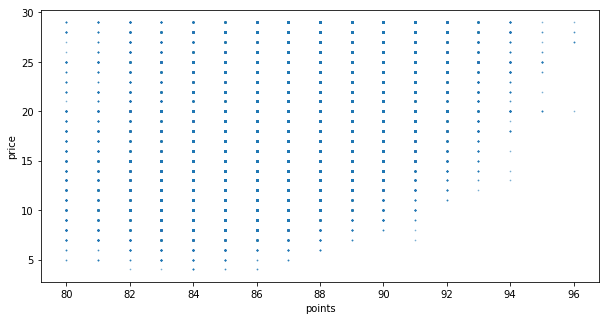

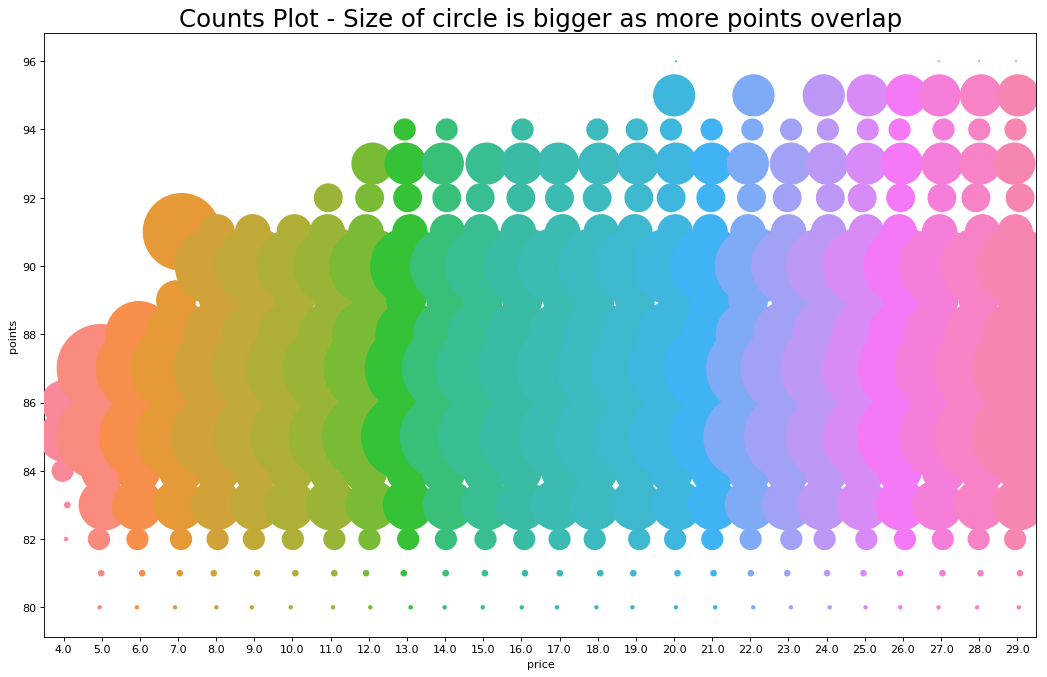

In [7]:
#Narrowing it down to "Cheaper" wines under $30
wine_under_30 = wine_prices_full[wine_prices_full['price'] < 30]
wine_under_30[wine_under_30['price'] < 30].plot.scatter(x='points', y='price', s=.5, alpha=0.5)

df_counts = wine_under_30.groupby(['points', 'price']).size().reset_index(name='counts')


fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.price, df_counts.points, size=df_counts.counts*2, ax=ax)
# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

In [8]:
#Analyzeing the 3 outliers we can reconmend 3 different bottles of wine for 3 different price points (depending on how much you like your date)
#We found a bottle for $20 and under, $15 and under and a $10 and under category.

#We can observe that there is a $20 bottle with a 96 point rating:
##Rulo 2007 Syrah (Columbia Valley (WA))	Syrah	Rulo
#Superb fruit highlights this tight, sculpted Syrah. It's extremely dense, with deep and intense raspberry and cassis fruit flavor, augmented with coffee grounds, smoke and iron filings. Complex, detailed, balanced and deepäóîwhat more can a wine give you? This is drinking very young and surely needs to be decanted. But already displaying amazing power.

#A $14 bottle with a 94 point rating:
#Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez)	Sherry	Osborne

#and a $7 bottle with a 91 point rating:
##Herdade dos Machados 2012 Toutalga Red (Alentejano)	Portuguese Red	Herdade dos Machados
##"Richly tannic, this concentrated wine has great structure and intense fruitiness and acidity. Generous and full bodied, it retains a dry core that gives shape to the ripe red berry fruits. Hints of wood aging still show, and the wine needs to develop further. Drink from 2017."

#If you are more of a white wine person, the furtherst outlier from our regression line was a 
#Kuentz-Bas 2015 Geisberg Grand Cru Riesling (Alsace)	Riesling from Kuentz-Bas winery in France
#It's $42 and 96 points





In [9]:
#That isn't working.  Let's establist a point per dollar metric for all wines under $30 and go from there.
wine_under_30["PPD"] = wine_under_30["points"]/wine_under_30["price"]
PPD = wine_under_30["PPD"]
wine_under_30

C:\Users\sohlb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,PPD
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,5.800000
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,6.214286
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,6.692308
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,5.800000
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin Oäó»Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,5.437500
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewí_rztraminer,Trimbach,3.625000
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewí_rztraminer (Rheinh...,Gewí_rztraminer,Heinz Eifel,7.250000
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,3.222222
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuví©e,87,19.0,California,Napa Valley,Napa,Virginie Boone,Kirkland Signature 2011 Mountain Cuví©e Cabern...,Cabernet Sauvignon,Kirkland Signature,4.578947
14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,7.250000


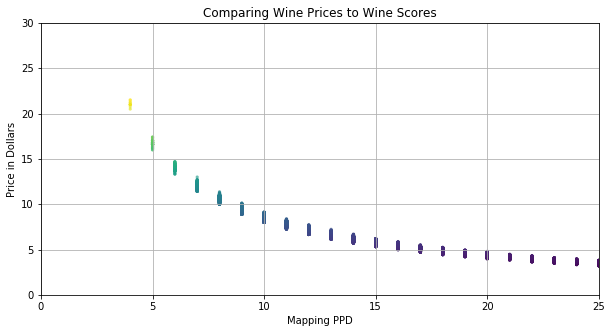

In [10]:
x_axis = wine_under_30['PPD']
price = wine_under_30['price']
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlim(0, 25)
plt.ylim(0, 30)
plt.title("Comparing Wine Prices to Wine Scores")
plt.xlabel("Mapping PPD")
plt.ylabel("Price in Dollars")
plt.grid()

c=wine_under_30["PPD"]
plt.scatter(price, x_axis, marker="o", c=c, s=5, alpha=0.5)

# Save the figure
# plt.savefig("Latitude_vs_Temp.png")


plt.show()



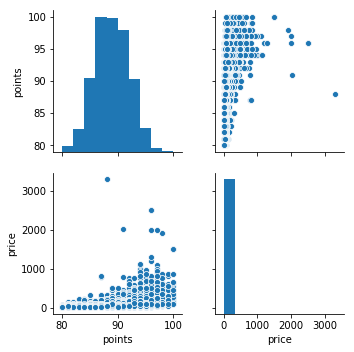

In [11]:
sns.pairplot(wine_prices_full)

C:\Users\sohlb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


          points     price
points  1.000000  0.416167
price   0.416167  1.000000


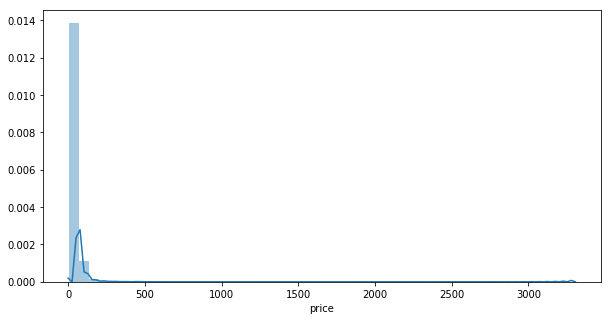

In [12]:
sns.distplot(wine_prices_full['price'])
print(wine_prices_full.corr())

C:\Users\sohlb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


          points     price
points  1.000000  0.404575
price   0.404575  1.000000


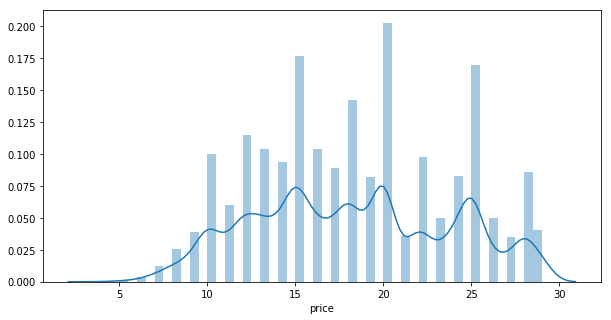

In [13]:
wine_under_30 = wine_prices_full[wine_prices_full['price'] < 30]
sns.distplot(wine_under_30['price'])
print(wine_under_30.corr())

C:\Users\sohlb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


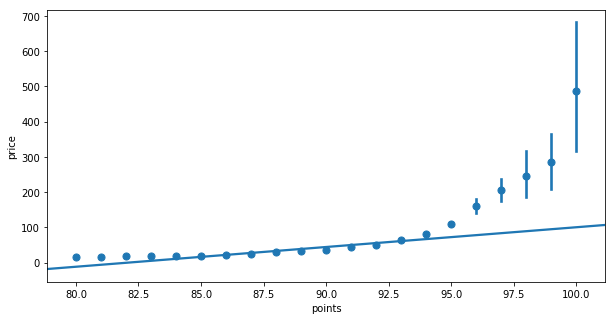

In [14]:
sns.regplot(x='points', y='price', x_estimator=np.mean, data=wine_prices_full)

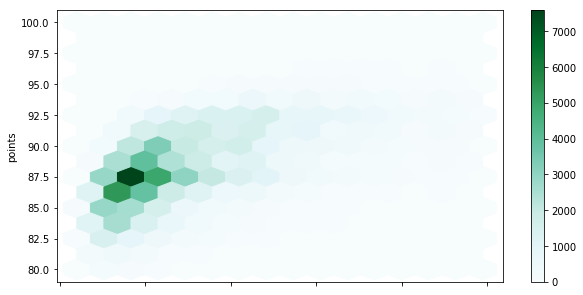

In [15]:
#Pretty Easy to spot the trend above right? - No -So Let's try something else
wine_prices_full[wine_prices_full['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
plt.rcParams['figure.figsize'] = [10, 5]
#Nope, this is showing how many times each score was given. 

C:\Users\sohlb\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\sohlb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Score out of 100')

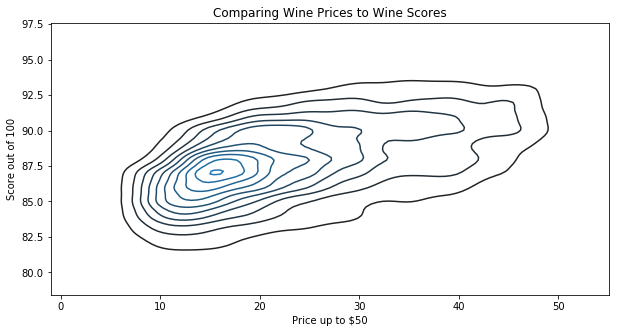

In [16]:
#Here is a graph that shows the relation to price and wine score. Price is on the x axis, Score on the y.
#This helps us find the optimal price to point range to be on the look out for.  
sns.kdeplot(wine_prices_full[wine_prices_full['price'] < 50].loc[:, ['price', 'points']].dropna().sample(5000))
plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Comparing Wine Prices to Wine Scores")
plt.xlabel("Price up to $50")
plt.ylabel("Score out of 100")

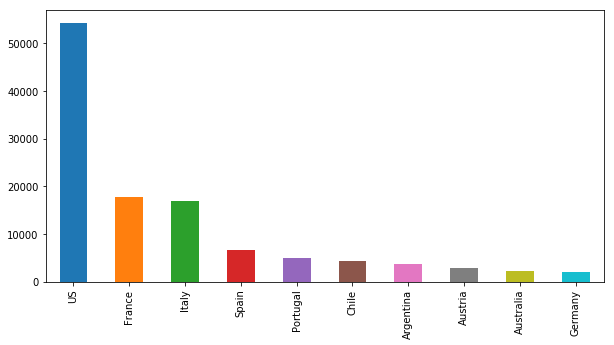

In [17]:
#This Chart shows which countries produced the most amount of wine that was reviewed in our dataset.
wine_prices_full['country'].value_counts().head(10).plot.bar()
# plt.gca().set_aspect('equal')


Number of Unique Countries in Dataset: 42


Text(0,0.5,'Country')

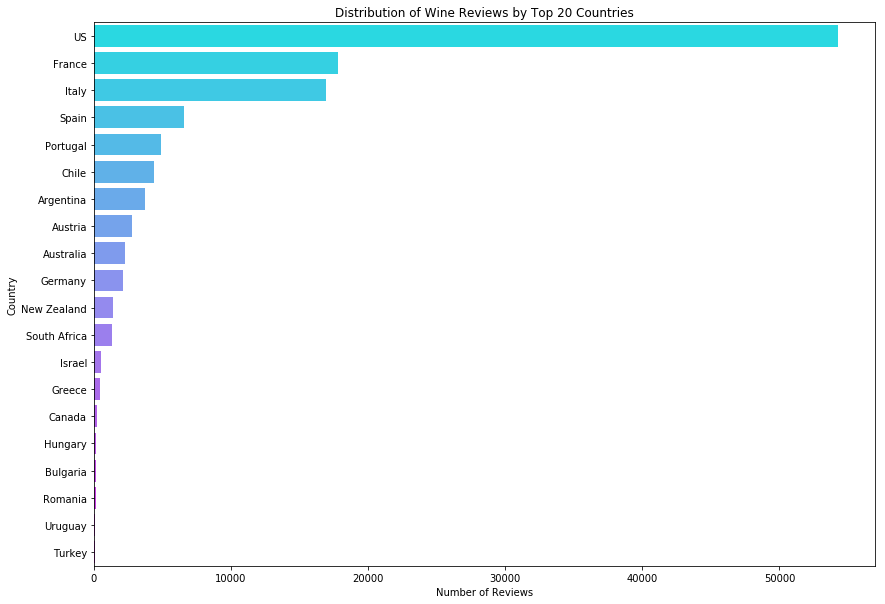

In [18]:
##This Chart shows which countries produced the most amount of wine that was reviewed in our dataset.
#Same Chart, just cooler looking 8]

print('Number of Unique Countries in Dataset:',wine_prices_full['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine_prices_full['country'].value_counts().to_frame()[0:20]
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='cool',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countries');
plt.xlabel("Number of Reviews")
plt.ylabel("Country")

Total Number of Unique Varities in Dataset: 697


Text(0,0.5,'Type of Wine')

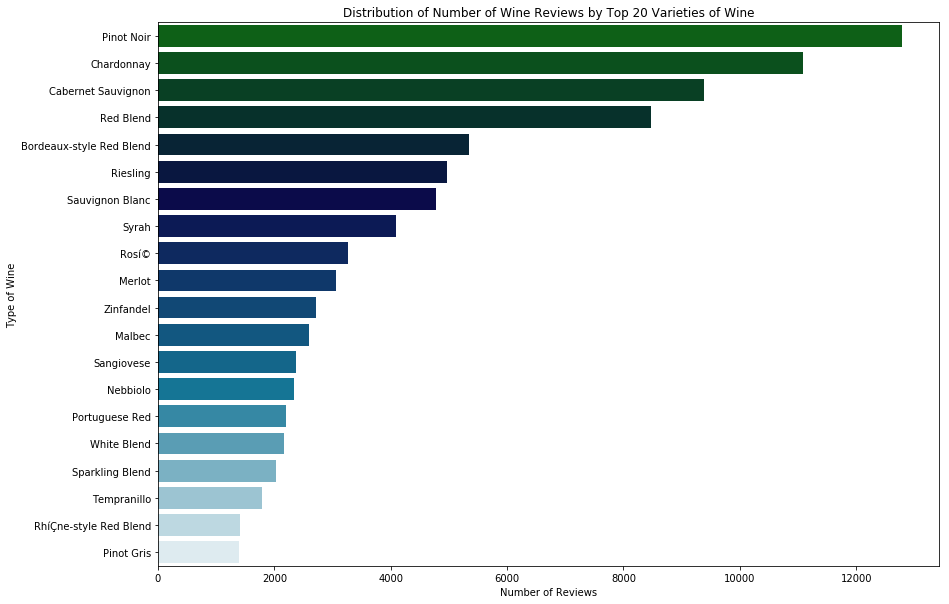

In [19]:
#This plot shows how often each variety (top 20) got reviewed. 
print('Total Number of Unique Varities in Dataset:',wine_prices_full['variety'].nunique())
plt.figure(figsize=(14,10))
cnt = wine_prices_full['variety'].value_counts().to_frame()[0:20]
#plt.xscale('log')
sns.barplot(x= cnt['variety'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Number of Wine Reviews by Top 20 Varieties of Wine');
plt.xlabel("Number of Reviews")
plt.ylabel("Type of Wine")

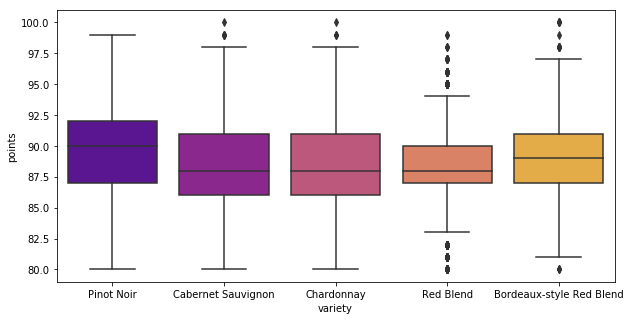

In [20]:
#This shows the top 5 most varieties of wine with their associated scores

df = wine_prices_full[wine_prices_full.variety.isin(wine_prices_full.variety.value_counts().head(5).index)]
plt.rcParams['figure.figsize'] = [10, 5]
sns.boxplot(
    x='variety',
    y='points',
    data=df,
palette='plasma')


C:\Users\sohlb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


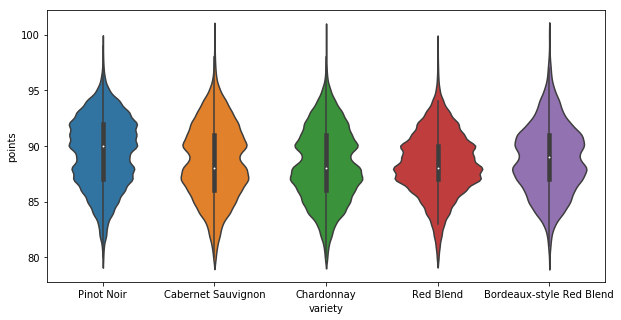

In [21]:
#Another way to visualize the most commonly reviewed variety of wines with the amount of associated scores.  

plt.rcParams['figure.figsize'] = [10, 5]
sns.violinplot(
    x='variety',
    y='points',
    data=wine_prices_full[wine_prices_full.variety.isin(wine_prices_full.variety.value_counts()[:5].index)]
)

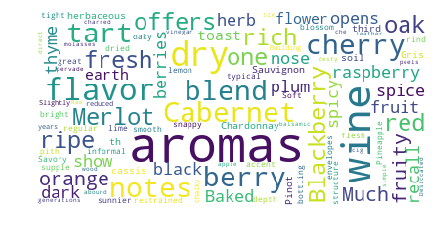

In [22]:
#top 100 words describing our wines.  

from wordcloud import WordCloud, STOPWORDS
plt.rcParams['figure.figsize']=(7.0,6.0)
plt.rcParams['font.size']=12                
plt.rcParams['savefig.dpi']=100              
plt.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
data = wine_prices_full
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=50, 
                          random_state=False
                         ).generate(str(data['description']))
#varibles for the wordcloud

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')

plt.show()


In [23]:
wine_under_30.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

In [24]:
wine_under_30['variety'].unique()

array(['Portuguese Red', 'Pinot Gris', 'Riesling', 'Tempranillo-Merlot',
       'Frappato', 'Gewí_rztraminer', 'Cabernet Sauvignon', 'Chardonnay',
       'Malbec', 'Tempranillo Blend', 'Red Blend', 'Pinot Noir',
       'White Blend', 'Merlot', "Nero d'Avola", 'Chenin Blanc',
       'Sauvignon Blanc', 'Viognier-Chardonnay', 'Primitivo',
       'Catarratto', 'Gamay', 'Inzolia', 'Petit Verdot', 'Monica',
       'Bordeaux-style White Blend', 'Grillo', 'Sangiovese',
       'Cabernet Franc', 'CarmeníÂre', 'Albarií±o', 'Petit Manseng',
       'Rosí©', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grí_ner Veltliner',
       'Viognier', 'Vermentino', 'Bordeaux-style Red Blend',
       'Grenache Blanc', 'Pinot Blanc', 'Alsace white blend', 'Barbera',
       'Tannat-Cabernet', 'Sauvignon', 'Syrah', 'Torrontí©s',
       'RhíÇne-style Red Blend', 'Fumí© Blanc', 'Bonarda', 'Shiraz',
       'Montepulciano', 'Moscato', 'Grenache', 'Ugni Blanc-Colombard',
       'Syrah-Viognier', 'Blaufrí_nkisch', 'Friulano', '

In [25]:
selected_variety = input("What type of wine are you looking for?  ")
print(f' These are your price options: {wine_under_30["price"].unique()}')
selected_price = int(input("How much are you looking to spend on a bottle of wine?  "))

What type of wine are you looking for?  Syrah
 These are your price options: [15. 14. 13. 16. 24. 12. 27. 19. 28. 23. 20. 22. 10. 17. 21. 11.  9. 25.
 26. 18. 29.  7.  8.  6.  4.  5.]
How much are you looking to spend on a bottle of wine?  11


In [26]:
top_selection = wine_under_30.loc[(wine_under_30['variety']==selected_variety) & (wine_under_30['price']==selected_price)].sort_values(by=['points'], ascending = False)
top_selection.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
44055,US,This is a young wine and tastes like a Beaujol...,NaN,88,11.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Snoqualmie 2000 Syrah (Columbia Valley (WA)),Syrah,Snoqualmie


In [27]:
# print(wine_under_30.loc[wine_under_30['price']==selected_price])
# wine_under_30['price'].unique()